In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sqlalchemy import create_engine
from pathlib import Path
from sqlalchemy import create_engine

In [4]:
#Create a reference to the SQLite database file
db_path = Path("SQLLite.db")
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{db_path}")
conn = engine.connect()
# Query all records in the the database
data = pd.read_sql("SELECT * FROM la_crime_Data", conn)
print(data.head())

# convert data into la_crime_df
la_crime_df = pd.DataFrame(data)

       DR_NO         DateRptd         DATEOCC  TIMEOCC  AREA   AREANAME  \
0  190326475    3/1/2020 0:00   3/1/2020 0:00     2130     7   Wilshire   
1  200106753    2/9/2020 0:00   2/8/2020 0:00     1800     1    Central   
2  200320258  11/11/2020 0:00  11/4/2020 0:00     1700     3  Southwest   
3  200907217   5/10/2023 0:00  3/10/2020 0:00     2037     9   Van Nuys   
4  220614831   8/18/2022 0:00  8/17/2020 0:00     1200     6  Hollywood   

   RptDistNo  Part1-2  CrmCd                                 CrmCdDesc  ...  \
0        784        1    510                          VEHICLE - STOLEN  ...   
1        182        1    330                     BURGLARY FROM VEHICLE  ...   
2        356        1    480                             BIKE - STOLEN  ...   
3        964        1    343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...   
4        666        2    354                         THEFT OF IDENTITY  ...   

  Status    StatusDesc CrmCd1 CrmCd2  CrmCd3 CrmCd4  \
0     AA  Adult Arr

In [5]:
# la_crime_df=pd.read_csv("./static/Data/LA_Crime_Data.csv")
la_crime_df.head(2)

,DR_NO,DateRptd,DATEOCC,TIMEOCC,AREA,AREANAME,RptDistNo,Part1-2,CrmCd,CrmCdDesc,...,Status,StatusDesc,CrmCd1,CrmCd2,CrmCd3,CrmCd4,LOCATION,CrossStreet,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998,None,None,1900 S LONGWOOD AV,None,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998,None,None,1000 S FLOWER ST,None,34.0444,-118.2628


In [7]:
la_crime_df["Part1-2"].value_counts()

Part1-2
1    545773
2    379947
Name: count, dtype: int64

In [8]:
any(la_crime_df.isna())

True

In [9]:
duplicates = la_crime_df.duplicated(subset=['DR_NO'])

# Check if there are any duplicates
has_duplicates = duplicates.any()

print(f"Are there duplicates in 'my_column'? {has_duplicates}")

Are there duplicates in 'my_column'? False


In [10]:
print("Number of rows: ", la_crime_df.shape[0])

Number of rows:  925720


In [11]:
print("Number of columns: ", la_crime_df.shape[1])

Number of columns:  28


In [12]:
la_crime_df.isnull().sum() # checkin for the number of null values across the dataframe

DR_NO                0
DateRptd             0
DATEOCC              0
TIMEOCC              0
AREA                 0
AREANAME             0
RptDistNo            0
Part1-2              0
CrmCd                0
CrmCdDesc            0
Mocodes         129462
VictAge              0
VictSex         123158
VictDescent     123168
PremisCd            11
PremisDesc         559
WeaponUsedCd    606019
WeaponDesc      606019
Status               0
StatusDesc           0
CrmCd1              11
CrmCd2          858483
CrmCd3          923460
CrmCd4          925656
LOCATION             0
CrossStreet     780494
LAT                  0
LON                  0
dtype: int64

In [13]:
la_crime_df.columns

Index(['DR_NO', 'DateRptd', 'DATEOCC', 'TIMEOCC', 'AREA', 'AREANAME',
       'RptDistNo', 'Part1-2', 'CrmCd', 'CrmCdDesc', 'Mocodes', 'VictAge',
       'VictSex', 'VictDescent', 'PremisCd', 'PremisDesc', 'WeaponUsedCd',
       'WeaponDesc', 'Status', 'StatusDesc', 'CrmCd1', 'CrmCd2', 'CrmCd3',
       'CrmCd4', 'LOCATION', 'CrossStreet', 'LAT', 'LON'],
      dtype='object')

In [15]:
la_crime_df = la_crime_df[["DATEOCC","TIMEOCC","AREANAME","RptDistNo","Part1-2","CrmCdDesc","VictAge","VictSex","VictDescent",
                           "StatusDesc","CrmCd1","LAT","LON"]]
la_crime_df.head(1)

,DATEOCC,TIMEOCC,AREANAME,RptDistNo,Part1-2,CrmCdDesc,VictAge,VictSex,VictDescent,StatusDesc,CrmCd1,LAT,LON
0,3/1/2020 0:00,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [16]:
la_crime_df.shape

(925720, 13)

In [17]:
la_crime_df.isnull().sum(axis = 0)

DATEOCC             0
TIMEOCC             0
AREANAME            0
RptDistNo           0
Part1-2             0
CrmCdDesc           0
VictAge             0
VictSex        123158
VictDescent    123168
StatusDesc          0
CrmCd1             11
LAT                 0
LON                 0
dtype: int64

In [18]:
la_crime_df=la_crime_df.dropna()
la_crime_df.shape

(802537, 13)

In [19]:
la_crime_df.head(2)

,DATEOCC,TIMEOCC,AREANAME,RptDistNo,Part1-2,CrmCdDesc,VictAge,VictSex,VictDescent,StatusDesc,CrmCd1,LAT,LON
0,3/1/2020 0:00,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506
1,2/8/2020 0:00,1800,Central,182,1,BURGLARY FROM VEHICLE,47,M,O,Invest Cont,330.0,34.0444,-118.2628


In [21]:
#to remove the "-" in the column Vict Descent
filtered_df = la_crime_df[la_crime_df["VictDescent"]!="-"]
la_crime_df = filtered_df
la_crime_df["VictDescent"].value_counts()

VictDescent
H    281378
W    187079
B    129709
X     93922
O     73010
A     20311
K      5085
F      4002
C      3712
J      1305
V       987
I       882
Z       458
P       250
U       190
D        75
G        67
L        63
S        50
Name: count, dtype: int64

In [22]:
la_crime_df.isnull().sum()

DATEOCC        0
TIMEOCC        0
AREANAME       0
RptDistNo      0
Part1-2        0
CrmCdDesc      0
VictAge        0
VictSex        0
VictDescent    0
StatusDesc     0
CrmCd1         0
LAT            0
LON            0
dtype: int64

In [23]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802535 entries, 0 to 925719
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATEOCC      802535 non-null  object 
 1   TIMEOCC      802535 non-null  int64  
 2   AREANAME     802535 non-null  object 
 3   RptDistNo    802535 non-null  int64  
 4   Part1-2      802535 non-null  int64  
 5   CrmCdDesc    802535 non-null  object 
 6   VictAge      802535 non-null  int64  
 7   VictSex      802535 non-null  object 
 8   VictDescent  802535 non-null  object 
 9   StatusDesc   802535 non-null  object 
 10  CrmCd1       802535 non-null  float64
 11  LAT          802535 non-null  float64
 12  LON          802535 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 85.7+ MB


In [24]:
# renaming for better readability
la_crime_df.rename(columns={"DATEOCC":"Date_Occ","TIMEOCC":"Time_Occ","AREANAME":"Area_Name","RptDistNo":"Rpt_Dist_No",
                            "Part1-2":"Part_1-2","CrmCdDesc":"Crm_Cd_Desc","VictAge":"Vict_Age","VictSex":"Vict_Sex",
                           "VictDescent":"Vict_Descent","StatusDesc":"Status_Desc","CrmCd1":"Crm_Cd_1",
                            "LAT":"Lat","LON":"Lon"}, inplace = True)

C:\Users\kengt\AppData\Local\Temp\ipykernel_29692\4122990672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_crime_df.rename(columns={"DATEOCC":"Date_Occ","TIMEOCC":"Time_Occ","AREANAME":"Area_Name","RptDistNo":"Rpt_Dist_No",


In [25]:
la_crime_df.head(1)
corr = la_crime_df[["Lat","Lon","Vict_Age"]].corr()
corr

,Lat,Lon,Vict_Age
Lat,1.000000,-0.998547,0.008387
Lon,-0.998547,1.000000,-0.007316
Vict_Age,0.008387,-0.007316,1.000000


In [26]:


# Convert the 'DateTime' column to datetime type if not alread


la_crime_df['Date_Occ'] = pd.to_datetime(la_crime_df['Date_Occ'])



C:\Users\kengt\AppData\Local\Temp\ipykernel_29692\2930072999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_crime_df['Date_Occ'] = pd.to_datetime(la_crime_df['Date_Occ'])


In [27]:
la_crime_df.head(1)

,Date_Occ,Time_Occ,Area_Name,Rpt_Dist_No,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
0,2020-03-01,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [28]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802535 entries, 0 to 925719
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Occ      802535 non-null  datetime64[ns]
 1   Time_Occ      802535 non-null  int64         
 2   Area_Name     802535 non-null  object        
 3   Rpt_Dist_No   802535 non-null  int64         
 4   Part_1-2      802535 non-null  int64         
 5   Crm_Cd_Desc   802535 non-null  object        
 6   Vict_Age      802535 non-null  int64         
 7   Vict_Sex      802535 non-null  object        
 8   Vict_Descent  802535 non-null  object        
 9   Status_Desc   802535 non-null  object        
 10  Crm_Cd_1      802535 non-null  float64       
 11  Lat           802535 non-null  float64       
 12  Lon           802535 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 85.7+ MB


In [29]:
# To remove the value H value of Vict_Sex
la_crime_df=la_crime_df[la_crime_df["Vict_Sex"]!="H"]
la_crime_df["Vict_Sex"].value_counts()

Vict_Sex
M    379020
F    337975
X     85434
Name: count, dtype: int64

In [30]:
la_crime_df.nunique()

Date_Occ        1553
Time_Occ        1439
Area_Name         21
Rpt_Dist_No     1199
Part_1-2           2
Crm_Cd_Desc      138
Vict_Age         103
Vict_Sex           3
Vict_Descent      19
Status_Desc        6
Crm_Cd_1         139
Lat             5376
Lon             4968
dtype: int64

In [31]:
la_crime_df["Area_Name"].nunique()

21

In [32]:
# Top 10 crime location
la_crime_df["Area_Name"].value_counts().head(10)

Area_Name
Central        57981
77th Street    49198
Pacific        46137
Southwest      44808
Hollywood      44421
N Hollywood    40753
Olympic        40669
Wilshire       39826
Southeast      39272
West LA        38613
Name: count, dtype: int64

In [33]:
la_crime_df["Area_Name"].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Topanga', 'Northeast', '77th Street',
       'N Hollywood', 'Hollenbeck', 'Harbor', 'Foothill', 'Devonshire',
       'Pacific'], dtype=object)

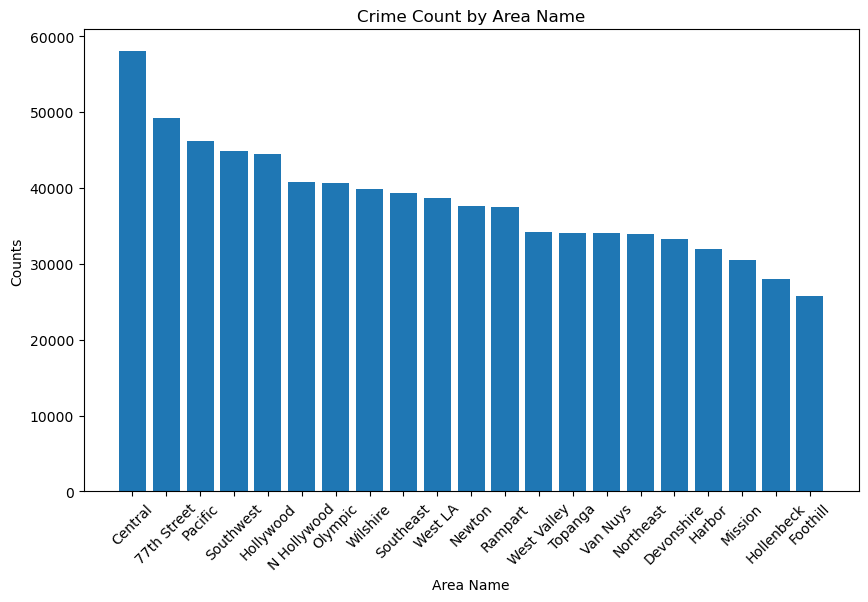

In [34]:

# Calculate value counts
area_counts = la_crime_df["Area_Name"].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(area_counts.index, area_counts.values)  # Use index and values to align data correctly
plt.xlabel("Area Name")
plt.ylabel("Counts")
plt.title("Crime Count by Area Name")
plt.xticks(rotation=45)  # Optional: Rotate the area names for better readability
plt.show()


In [35]:
la_crime_df["Crm_Cd_Desc"].nunique() # numbe of crime descriptions

138

In [36]:
# the top 10 crime types
la_crime_df["Crm_Cd_Desc"].value_counts().head(10)

Crm_Cd_Desc
BATTERY - SIMPLE ASSAULT                                   73348
BURGLARY FROM VEHICLE                                      57042
THEFT OF IDENTITY                                          57031
BURGLARY                                                   56669
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    56107
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             52462
THEFT PLAIN - PETTY ($950 & UNDER)                         47108
INTIMATE PARTNER - SIMPLE ASSAULT                          45882
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        33048
ROBBERY                                                    31491
Name: count, dtype: int64

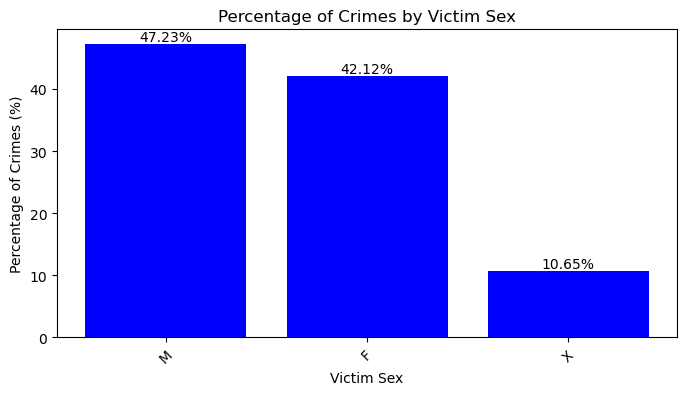

In [37]:

# Calculate value counts for the 'Vict_Sex' column
sex_counts = la_crime_df['Vict_Sex'].value_counts()

# Calculate total instances
total_instances = sex_counts.sum()

# Calculate percentages
sex_percentages = (sex_counts / total_instances) * 100

# Plotting
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
bars = plt.bar(sex_percentages.index, sex_percentages.values, color='blue')  # Choose any color you like

# Adding text labels on the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')  # Position text inside the bars

plt.xlabel('Victim Sex')
plt.ylabel('Percentage of Crimes (%)')
plt.title('Percentage of Crimes by Victim Sex')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.savefig("static/Images/victim_sex_percentile.png")
plt.show()


In [38]:

# Convert the column to string and ensure it has at least 4 digits (HHMM format)
la_crime_df['Time_Occ'] = la_crime_df['Time_Occ'].astype(str).str.zfill(4)

# Extract the hour part (HH) by slicing the string
la_crime_df['24Hour_Occ'] = la_crime_df['Time_Occ'].str.slice(start=0, stop=2).astype(int)

# Now you can check the transformed data
print(la_crime_df[['Time_Occ', '24Hour_Occ']])


C:\Users\kengt\AppData\Local\Temp\ipykernel_29692\2823949429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_crime_df['Time_Occ'] = la_crime_df['Time_Occ'].astype(str).str.zfill(4)


       Time_Occ  24Hour_Occ
0          2130          21
1          1800          18
2          1700          17
3          2037          20
4          1200          12
...         ...         ...
925715     1920          19
925716     0720           7
925717     2330          23
925718     1510          15
925719     0100           1

[802429 rows x 2 columns]


C:\Users\kengt\AppData\Local\Temp\ipykernel_29692\2823949429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_crime_df['24Hour_Occ'] = la_crime_df['Time_Occ'].str.slice(start=0, stop=2).astype(int)


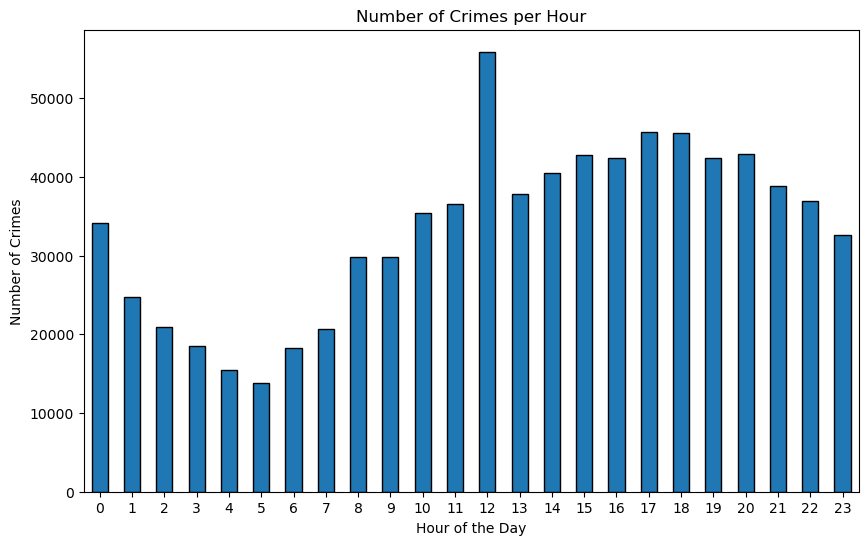

In [39]:


# Group by '24Hour_Occ' and count the number of crimes
hourly_crimes = la_crime_df.groupby('24Hour_Occ').size()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size as needed
hourly_crimes.plot(kind='bar', edgecolor='black')

# Set the labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Hour')
plt.xticks(range(0, 24), rotation=0)  # Set x-ticks to be every hour
plt.savefig("static/Images/crime_by_hour.png")
plt.show()


In [40]:
la_crime_df.head()

,Date_Occ,Time_Occ,Area_Name,Rpt_Dist_No,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon,24Hour_Occ
0,2020-03-01,2130,Wilshire,784,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506,21
1,2020-02-08,1800,Central,182,1,BURGLARY FROM VEHICLE,47,M,O,Invest Cont,330.0,34.0444,-118.2628,18
2,2020-11-04,1700,Southwest,356,1,BIKE - STOLEN,19,X,X,Invest Cont,480.0,34.0210,-118.3002,17
3,2020-03-10,2037,Van Nuys,964,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,Invest Cont,343.0,34.1576,-118.4387,20
4,2020-08-17,1200,Hollywood,666,2,THEFT OF IDENTITY,28,M,H,Invest Cont,354.0,34.0944,-118.3277,12


In [41]:
#Filtering out Vict_Age to greater than zero
la_crime_df = la_crime_df[la_crime_df["Vict_Age"]> 0]

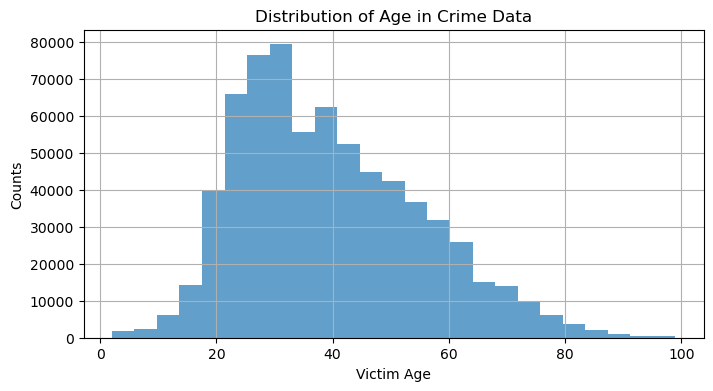

In [42]:
# Age of Victims Distribution


la_crime_df['Vict_Age'] = pd.to_numeric(la_crime_df['Vict_Age'], errors='coerce')

# Drop any NaN values that may have resulted from conversion errors or existing in data
la_crime_df = la_crime_df.dropna(subset=['Vict_Age'])

# Plotting a histogram of the 'Age' column
plt.figure(figsize=(8, 4))
plt.hist(la_crime_df['Vict_Age'], bins=25, alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Victim Age')
plt.ylabel('Counts')
plt.title('Distribution of Age in Crime Data')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.savefig("static/Images/victim_age_distribution.png")
plt.show()


In [43]:
la_crime_df["Vict_Age"].max(), la_crime_df["Vict_Age"].min()

(99, 2)

In [44]:
# Top 5 Vict Descents
top5 =la_crime_df.groupby(["Vict_Descent"])["Vict_Age"].count()
top5

Vict_Descent
A     19980
B    128204
C      3706
D        75
F      3938
G        67
H    276655
I       881
J      1304
K      5059
L        62
O     60991
P       249
S        45
U       156
V       981
W    173400
X     15065
Z       458
Name: Vict_Age, dtype: int64

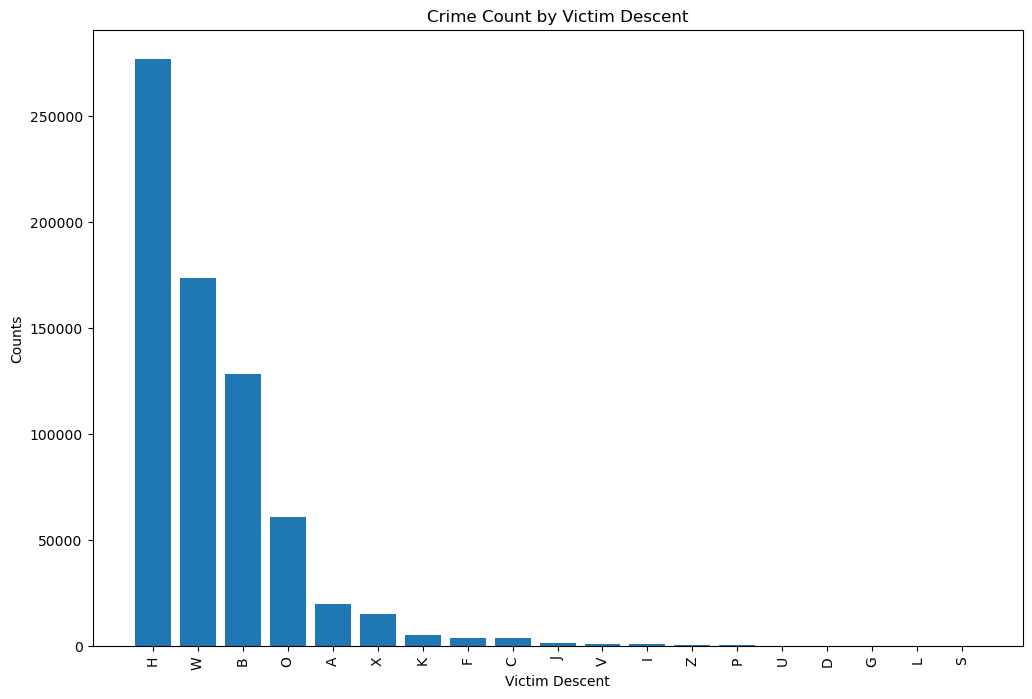

In [45]:

# Calculate the value counts for the 'Vict_Descent' column
descent_counts = la_crime_df['Vict_Descent'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.bar(descent_counts.index, descent_counts.values)
plt.xlabel('Victim Descent')
plt.ylabel('Counts')
plt.title('Crime Count by Victim Descent')
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many categories
plt.show()


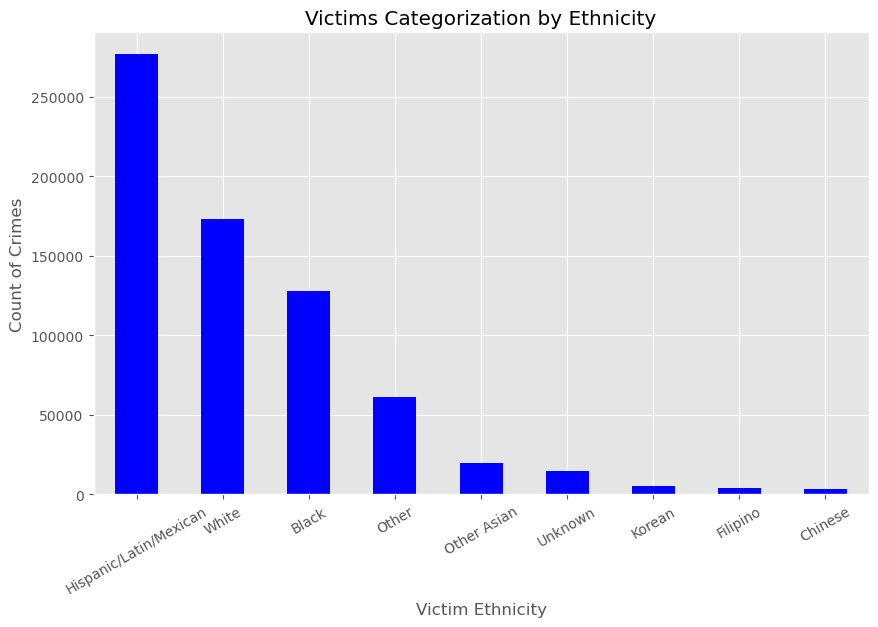

In [46]:


# Renaming values in the 'Vict_Descent' column
rename_dict = {
    'H': 'Hispanic/Latin/Mexican',
    'B': 'Black',
    'W': 'White',
    'A': 'Other Asian',
    'X': 'Unknown',
    'C': 'Chinese',
    'D': 'Cambodian',  # Note the typo fix from 'Combodian' to 'Cambodian'
    'F': 'Filipino',
    'G': 'Guamanian',
    'I': 'American Indian/Alaskan Native',  # Minor correction for consistency
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'Z': 'Asian Indian'
}


# Renaming ethnicities in the dataframe for clarity
la_crime_df["Vict_Descent"] = la_crime_df["Vict_Descent"].replace(rename_dict)

# Plotting the top 9 ethnicities based on the count of crimes
plt.style.use('ggplot')  # Using ggplot style for aesthetics
plt.figure(figsize=(10, 6))  # Setting the figure size

# Selecting the top 9 ethnicities and plotting with a uniform color
la_crime_df["Vict_Descent"].value_counts().iloc[:9].plot.bar(color='blue')

# Setting the title and labels for the plot
plt.title('Victims Categorization by Ethnicity')
plt.xlabel('Victim Ethnicity')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=30)
# Saving the figure to a file in a specified path
plt.savefig("static/Images/crime_victim_by_ethnicity.png")
plt.show()  # Displaying the plot


Area_Name
Southeast      36
Pacific        35
77th Street    30
Central        28
Newton         20
Harbor         14
N Hollywood    14
Southwest      13
Northeast      12
Van Nuys       12
Name: count, dtype: int64


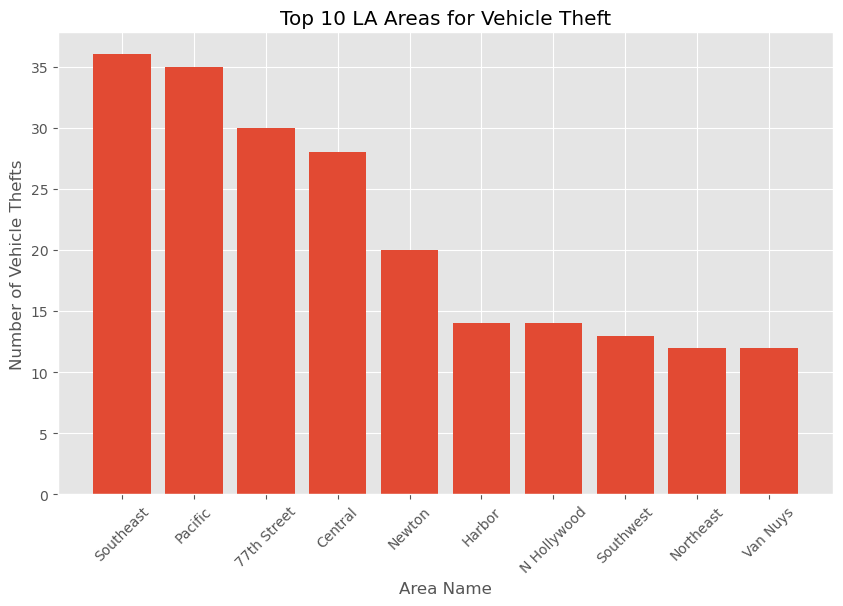

In [47]:


# Filtering the DataFrame for vehicle theft - adapt the condition to match your dataset's specifics
vehicle_theft_df = la_crime_df[la_crime_df["Crm_Cd_Desc"].str.contains("VEHICLE - STOLEN", na=False)]

# Counting occurrences in each area and getting the top 10
top_vehicle_theft_areas = vehicle_theft_df['Area_Name'].value_counts().head(10)

# Display the results
print(top_vehicle_theft_areas)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_vehicle_theft_areas.index, top_vehicle_theft_areas.values)  # Plot a bar chart
plt.title('Top 10 LA Areas for Vehicle Theft')
plt.xlabel('Area Name') 
plt.ylabel('Number of Vehicle Thefts') 
plt.xticks(rotation=45) 
plt.savefig("static/Images/vehicle_theft_by_area.png")
plt.show()  


In [48]:
la_crime_df.shape

(691276, 14)

In [49]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691276 entries, 1 to 925718
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Occ      691276 non-null  datetime64[ns]
 1   Time_Occ      691276 non-null  object        
 2   Area_Name     691276 non-null  object        
 3   Rpt_Dist_No   691276 non-null  int64         
 4   Part_1-2      691276 non-null  int64         
 5   Crm_Cd_Desc   691276 non-null  object        
 6   Vict_Age      691276 non-null  int64         
 7   Vict_Sex      691276 non-null  object        
 8   Vict_Descent  691276 non-null  object        
 9   Status_Desc   691276 non-null  object        
 10  Crm_Cd_1      691276 non-null  float64       
 11  Lat           691276 non-null  float64       
 12  Lon           691276 non-null  float64       
 13  24Hour_Occ    691276 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(3), object(6)
memory us

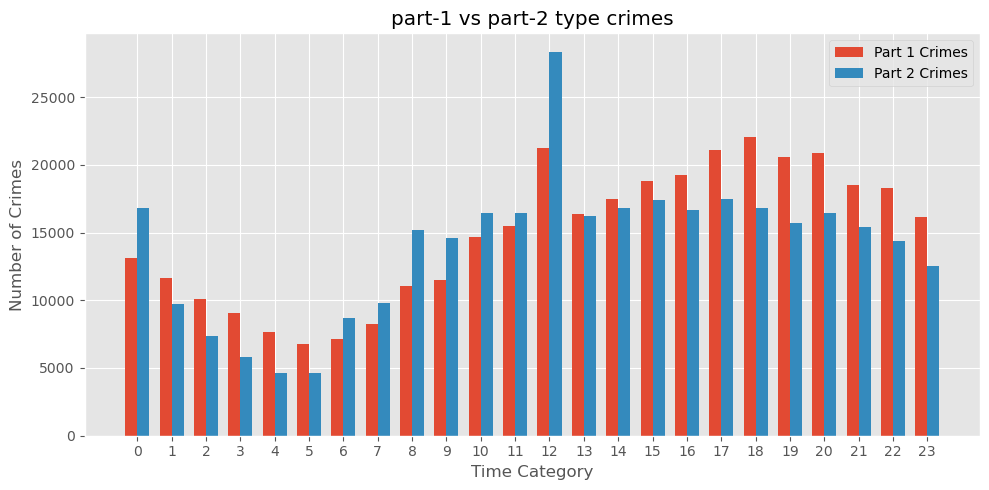

In [50]:

# and 'Part_1_2' column indicating if it's a Part 1 or Part 2 crime.

# First, let's ensure 'Part_1_2' is a categorical variable as well
la_crime_df['Part_1-2'] = la_crime_df['Part_1-2'].astype('category')

# Now, we can count the number of crimes in each category for Part 1 and Part 2 separately
part_1_counts = la_crime_df[la_crime_df['Part_1-2'] == 1]['24Hour_Occ'].value_counts().sort_index()
part_2_counts = la_crime_df[la_crime_df['Part_1-2'] == 2]['24Hour_Occ'].value_counts().sort_index()

# Set up the bar width
bar_width = 0.35

# Set up the index for the bars
index = range(len(part_1_counts))

# Plot the data
plt.figure(figsize=(10, 5))

# Create bars for Part 1
plt.bar(index, part_1_counts, bar_width, label='Part 1 Crimes')

# Create bars for Part 2, offset by the width of the bars
plt.bar([i + bar_width for i in index], part_2_counts, bar_width, label='Part 2 Crimes')

# Add title and labels
plt.title('part-1 vs part-2 type crimes')
plt.xlabel('Time Category')
plt.ylabel('Number of Crimes')

# Add xticks: we place them in the middle of the two bars using the index and bar_width
plt.xticks([i + bar_width / 2 for i in index], part_1_counts.index)
plt.legend()
plt.tight_layout()
plt.savefig("static/Images/part_1_part_2.png")
plt.show()



In [45]:
#Pre Machine Learning 
#Visualize the data using pandas histogram for the continous variables 

<Figure size 2000x1500 with 0 Axes>

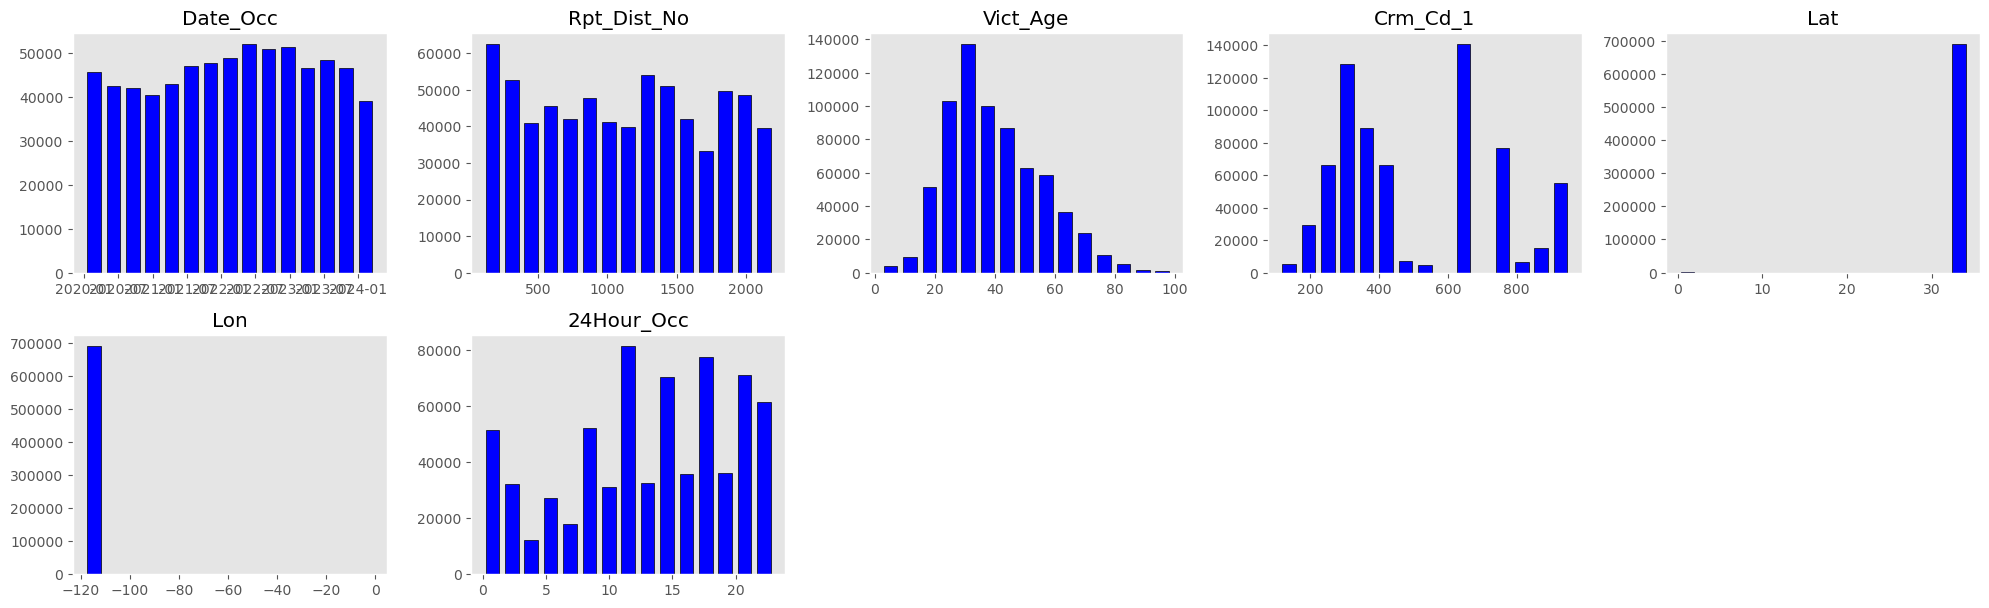

In [46]:
import matplotlib.pyplot as plt

# Set the figure size before plotting
plt.figure(figsize=(20, 15))

# Assuming la_crime_df is your DataFrame and you want to plot histograms for all numerical columns
axes = la_crime_df.hist(rwidth=0.7, grid=False, figsize=(20, 15), layout=(5, 5), # Adjust layout as needed
                        bins=15, color='blue', edgecolor='black')

# Apply tight_layout after plotting to adjust the spacing
plt.tight_layout()
plt.savefig("static/Images/general_distribution.png")
plt.show()


In [47]:
la_crime_df.head(2)

,Date_Occ,Time_Occ,Area_Name,Rpt_Dist_No,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon,24Hour_Occ
1,2020-02-08,1800,Central,182,1,BURGLARY FROM VEHICLE,47,M,Other,Invest Cont,330.0,34.0444,-118.2628,18
2,2020-11-04,1700,Southwest,356,1,BIKE - STOLEN,19,X,Unknown,Invest Cont,480.0,34.0210,-118.3002,17


In [48]:
#selecting few variables for machine learning
la_crime_df = la_crime_df[["Vict_Sex","Vict_Age","Lat","Lon","Rpt_Dist_No","Vict_Descent","Area_Name","24Hour_Occ","Crm_Cd_Desc","Part_1-2"]]

In [49]:
la_crime_df.head()

,Vict_Sex,Vict_Age,Lat,Lon,Rpt_Dist_No,Vict_Descent,Area_Name,24Hour_Occ,Crm_Cd_Desc,Part_1-2
1,M,47,34.0444,-118.2628,182,Other,Central,18,BURGLARY FROM VEHICLE,1
2,X,19,34.0210,-118.3002,356,Unknown,Southwest,17,BIKE - STOLEN,1
3,M,19,34.1576,-118.4387,964,Other,Van Nuys,20,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),1
4,M,28,34.0944,-118.3277,666,Hispanic/Latin/Mexican,Hollywood,12,THEFT OF IDENTITY,2
5,M,41,33.9467,-118.2463,1826,Hispanic/Latin/Mexican,Southeast,23,THEFT OF IDENTITY,2


In [50]:
la_crime_df["Vict_Sex"].value_counts()

Vict_Sex
M    348234
F    334231
X      8811
Name: count, dtype: int64

In [51]:
la_crime_df["Vict_Descent"].value_counts()

Vict_Descent
Hispanic/Latin/Mexican            276655
White                             173400
Black                             128204
Other                              60991
Other Asian                        19980
Unknown                            15065
Korean                              5059
Filipino                            3938
Chinese                             3706
Japanese                            1304
Vietnamese                           981
American Indian/Alaskan Native       881
Asian Indian                         458
P                                    249
Hawaiian                             156
Cambodian                             75
Guamanian                             67
Laotian                               62
Samoan                                45
Name: count, dtype: int64

In [52]:
la_crime_df["Area_Name"].value_counts()

Area_Name
Central        48784
77th Street    43957
Southwest      43942
Pacific        38818
Hollywood      36911
Southeast      35001
Olympic        34395
N Hollywood    33538
Wilshire       33532
Topanga        32063
Newton         31979
Rampart        31494
West LA        31439
Van Nuys       31115
West Valley    29015
Mission        28132
Northeast      27657
Devonshire     27176
Harbor         26191
Foothill       23117
Hollenbeck     23020
Name: count, dtype: int64

In [53]:
la_crime_df["24Hour_Occ"].value_counts()

24Hour_Occ
12    49523
18    38878
17    38558
20    37271
19    36270
15    36250
16    35901
14    34251
21    33925
22    32636
13    32585
11    31916
10    31153
0     29979
23    28684
8     26244
9     26049
1     21382
7     18022
2     17432
6     15875
3     14874
4     12266
5     11352
Name: count, dtype: int64

In [54]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691276 entries, 1 to 925718
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Vict_Sex      691276 non-null  object  
 1   Vict_Age      691276 non-null  int64   
 2   Lat           691276 non-null  float64 
 3   Lon           691276 non-null  float64 
 4   Rpt_Dist_No   691276 non-null  int64   
 5   Vict_Descent  691276 non-null  object  
 6   Area_Name     691276 non-null  object  
 7   24Hour_Occ    691276 non-null  int32   
 8   Crm_Cd_Desc   691276 non-null  object  
 9   Part_1-2      691276 non-null  category
dtypes: category(1), float64(2), int32(1), int64(2), object(4)
memory usage: 50.8+ MB


In [55]:
#change the object dtypes into categorical
la_crime_df["Vict_Sex"] = la_crime_df["Vict_Sex"].astype("category")
la_crime_df["Area_Name"] = la_crime_df["Area_Name"].astype("category")
la_crime_df["Vict_Descent"]=la_crime_df["Vict_Descent"].astype("category")
la_crime_df["24Hour_Occ"]=la_crime_df["24Hour_Occ"].astype("category")
la_crime_df["Part_1-2"]=la_crime_df["Part_1-2"].astype("category")
la_crime_df["Crm_Cd_Desc"]=la_crime_df["Crm_Cd_Desc"].astype("category")

In [56]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691276 entries, 1 to 925718
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Vict_Sex      691276 non-null  category
 1   Vict_Age      691276 non-null  int64   
 2   Lat           691276 non-null  float64 
 3   Lon           691276 non-null  float64 
 4   Rpt_Dist_No   691276 non-null  int64   
 5   Vict_Descent  691276 non-null  category
 6   Area_Name     691276 non-null  category
 7   24Hour_Occ    691276 non-null  category
 8   Crm_Cd_Desc   691276 non-null  category
 9   Part_1-2      691276 non-null  category
dtypes: category(6), float64(2), int64(2)
memory usage: 31.0 MB


In [57]:
#Target/dependent Variable Crm_Cd_Desc
#independent variables Vict_Sex, Vict_Age, Lat, Lon,Area_Name,24Hour_Occ

In [58]:
la_crime_df.dtypes

Vict_Sex        category
Vict_Age           int64
Lat              float64
Lon              float64
Rpt_Dist_No        int64
Vict_Descent    category
Area_Name       category
24Hour_Occ      category
Crm_Cd_Desc     category
Part_1-2        category
dtype: object

In [59]:

# Convert 'Vict_Sex' and 'Area_Name' to dummy variables
dummies = pd.get_dummies(la_crime_df[['Vict_Sex', 'Area_Name',"Vict_Descent","24Hour_Occ","Crm_Cd_Desc"]])
dummies =dummies.astype(int)

# Concatenate the dummy DataFrame with the original DataFrame (optional)
# This step assumes you want to keep the rest of your data alongside the new dummy variables
la_crime_df = pd.concat([la_crime_df, dummies], axis=1)

# Optionally, you might want to drop the original columns if they are no longer needed
la_crime_df.drop(['Vict_Sex', 'Area_Name',"Vict_Descent","24Hour_Occ","Crm_Cd_Desc"], axis=1, inplace=True)

# Display the DataFrame to verify changes
la_crime_df.head(2)


,Vict_Age,Lat,Lon,Rpt_Dist_No,Part_1-2,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X,Area_Name_77th Street,Area_Name_Central,...,Crm_Cd_Desc_UNAUTHORIZED COMPUTER ACCESS,"Crm_Cd_Desc_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",Crm_Cd_Desc_VANDALISM - MISDEAMEANOR ($399 OR UNDER),Crm_Cd_Desc_VEHICLE - ATTEMPT STOLEN,Crm_Cd_Desc_VEHICLE - STOLEN,"Crm_Cd_Desc_VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",Crm_Cd_Desc_VIOLATION OF COURT ORDER,Crm_Cd_Desc_VIOLATION OF RESTRAINING ORDER,Crm_Cd_Desc_VIOLATION OF TEMPORARY RESTRAINING ORDER,Crm_Cd_Desc_WEAPONS POSSESSION/BOMBING
1,47,34.0444,-118.2628,182,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,19,34.0210,-118.3002,356,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
###############################################consider only data for 2023 as the machine have a hard time
#########################################3
la_crime_df_2023 = la_crime_df.iloc[:234640]
la_crime_df_2023.shape

(234640, 209)

In [61]:
#######################################
######################################

In [62]:

#creating x and y variables
x=la_crime_df_2023.drop("Part_1-2", axis = 1)
y=la_crime_df_2023["Part_1-2"]

In [63]:
x.shape # its a dataframe

(234640, 208)

In [64]:
y.shape # series 

(234640,)

In [65]:
y

1         1
2         1
3         1
4         2
5         2
         ..
309424    2
309427    2
309428    1
309429    2
309430    1
Name: Part_1-2, Length: 234640, dtype: category
Categories (2, int64): [1, 2]

In [66]:
x

,Vict_Age,Lat,Lon,Rpt_Dist_No,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X,Area_Name_77th Street,Area_Name_Central,Area_Name_Devonshire,...,Crm_Cd_Desc_UNAUTHORIZED COMPUTER ACCESS,"Crm_Cd_Desc_VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",Crm_Cd_Desc_VANDALISM - MISDEAMEANOR ($399 OR UNDER),Crm_Cd_Desc_VEHICLE - ATTEMPT STOLEN,Crm_Cd_Desc_VEHICLE - STOLEN,"Crm_Cd_Desc_VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",Crm_Cd_Desc_VIOLATION OF COURT ORDER,Crm_Cd_Desc_VIOLATION OF RESTRAINING ORDER,Crm_Cd_Desc_VIOLATION OF TEMPORARY RESTRAINING ORDER,Crm_Cd_Desc_WEAPONS POSSESSION/BOMBING
1,47,34.0444,-118.2628,182,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,19,34.0210,-118.3002,356,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,34.1576,-118.4387,964,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,34.0944,-118.3277,666,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41,33.9467,-118.2463,1826,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309424,57,33.9623,-118.2783,1267,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
309427,31,34.0170,-118.3477,362,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
309428,30,34.1739,-118.4400,946,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309429,22,34.1849,-118.4095,1523,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#create train and test dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) # 




In [68]:
#To Normalise or Standardize features
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Scale only the features (X_train)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [69]:
x_train_scaled

array([[ 0.27904223,  0.12545712, -0.08792016, ..., -0.13072954,
        -0.03287606, -0.00337121],
       [-1.33049176,  0.04943862, -0.06382777, ..., -0.13072954,
        -0.03287606, -0.00337121],
       [-0.94420361,  0.03656755, -0.08499114, ..., -0.13072954,
        -0.03287606, -0.00337121],
       ...,
       [-1.71677992,  0.03673416, -0.06747704, ..., -0.13072954,
        -0.03287606, -0.00337121],
       [-1.33049176,  0.02269677, -0.06488414, ..., -0.13072954,
        -0.03287606, -0.00337121],
       [-0.04286457,  0.10892049, -0.07278289, ..., -0.13072954,
        -0.03287606, -0.00337121]])

In [70]:
from sklearn.tree import DecisionTreeClassifier # DecisionTree classifier

In [71]:
#entropy measures the diversity or impurity of within the data , our aim is to get low entropy value
#gini index or coefficient 
#information Gain we can use this for both entropy or gini methods

In [72]:
# IN DecsionTree we are always considering
#min_sample_split
#min_sample_leaf
#max_leaf_nodes
#splitter
#max_features
#presort
#criterion
#min_impurity_decrease

In [73]:
#Train the model and create the object dtc decsion tree classifier
dtc_model = DecisionTreeClassifier(random_state = 0)

In [74]:
dtc_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=0)

In [75]:
y_predict = dtc_model.predict(x_test_scaled)
y_predict

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [76]:
#Evaluating the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
dtc_model_score = dtc_model.score(x_test_scaled,y_test)

In [77]:
cm

array([[30203,     4],
       [    2, 28451]], dtype=int64)

In [78]:
dtc_model_score

0.9998977156495056

In [79]:
#import Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc_model = RandomForestClassifier(random_state =0)

In [81]:
rfc_model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=0)

In [82]:
y_predict = rfc_model.predict(x_test_scaled)
y_predict

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [83]:
#Evaluate the model 
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_predict)
rfc_model_score = rfc_model.score(x_test_scaled,y_test)

In [84]:
cm2

array([[30198,     9],
       [    5, 28448]], dtype=int64)

In [85]:
rfc_model_score

0.9997613365155131

In [86]:
#Logistic Regression
#build the logistic Regression model
from sklearn.linear_model import LogisticRegression

In [87]:
lr_model = LogisticRegression()

In [88]:
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [89]:
y_predict = lr_model.predict(x_test_scaled)
y_predict

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [90]:
#Evaluate the result/predictions and get the accuracy/score

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm_logistic = confusion_matrix(y_test,y_predict)
cm_logistic

array([[30207,     0],
       [    2, 28451]], dtype=int64)

In [93]:
lr_model_score = lr_model.score(x_test_scaled,y_test)
lr_model_score

0.9999659052165019

In [94]:
#SVM is used for both regression and Classfication 
#Build the support Vector Classifier
from sklearn.svm import SVC

In [95]:
#create an object of svc
svc_model = SVC()

In [96]:
svc_model.fit(x_train_scaled,y_train) # fitting 

SVC()

In [97]:
#predict the outcome using test data
y_predict = svc_model.predict(x_test_scaled)
y_predict

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [98]:
#building confusion matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[30202,     5],
       [   16, 28437]], dtype=int64)

In [99]:
svc_model_score = svc_model.score(x_test_scaled,y_test)
svc_model_score

0.9996420047732697